In [64]:
import numpy as np
import matplotlib.pyplot as plt

fname = 'facet-ii_data/quadrupoles/quad_m1-34.ru1'
data = []
with open(fname,'r') as f:
    f.readline()
    for line in f:
        temp = line.rstrip().split(' ')
        d = []
        for ele in temp:
            if ele != '':
                d += [ele]
        data += [d]
data = np.asfarray(data)
data[:,0] =data[:,0] / np.max(data[:,0])
data[:,2] = -data[:,2]

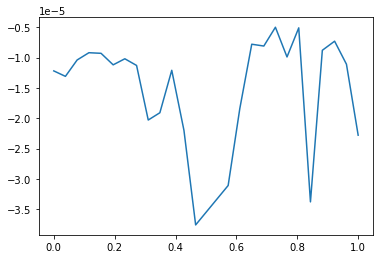

In [65]:
fig,ax = plt.subplots()
ax.plot(data[:,0],data[:,2])

In [66]:
fname = 'facet-ii_data/quadrupoles/quad_m1-34.ru1'
data = []
with open(fname,'r') as f:
    f.readline()
    for line in f:
        temp = line.rstrip().split(' ')
        d = []
        for ele in temp:
            if ele != '':
                d += [ele]
        data += [d]
data = np.asfarray(data)
data[:, 1] = data[:, 1] / np.max(data[:, 1])
data[:, 3] = data[:, 3] * np.where(data[:,7] < 0, -1, 1)



calculating states
calculating states
[iteration 0001] loss: 1290.5548
[iteration 0101] loss: 1985.5604
[iteration 0201] loss: 1587.5616
[iteration 0301] loss: 1043.0496
[iteration 0401] loss: 2789.9745
[iteration 0501] loss: 1726.3465
[iteration 0601] loss: 1737.9606
[iteration 0701] loss: 6756.4678
[iteration 0801] loss: 12845.4498
[iteration 0901] loss: 1455.9640
[iteration 1001] loss: 3115.6051
[iteration 1101] loss: 1925.7765
[iteration 1201] loss: 2077.6342
[iteration 1301] loss: 2973.6499
[iteration 1401] loss: 6557.3402
[iteration 1501] loss: 6154.0653
[iteration 1601] loss: 1087.2563
[iteration 1701] loss: 2309.2275
[iteration 1801] loss: 908.8160
[iteration 1901] loss: 3487.2761
[iteration 2001] loss: 3710.2520
[iteration 2101] loss: 1195.3853
[iteration 2201] loss: 2423.4722
[iteration 2301] loss: 790.6159
[iteration 2401] loss: 747.0368
[iteration 2501] loss: 1659.6727
[iteration 2601] loss: 1963.4778
[iteration 2701] loss: 982.4892
[iteration 2801] loss: 1427.3965
[iterati

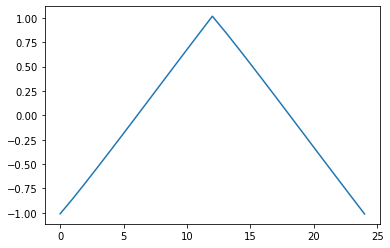

In [67]:
from pyro.infer.autoguide import AutoMultivariateNormal
from bayesian_utils import train_bayes, predict
from utils import train
from bayes_hysteresis_correlated import CorrelatedBayesianHysteresis
from bayes_hysteresis import  BayesianHysteresis
import hysteresis
from hysteresis_triangle import HysteresisTriangle
import torch

fig,ax = plt.subplots()
ax.plot(data[:,3])

h = torch.tensor(data[:,1]).double()
m = torch.tensor(data[:,3]).double()

h_train = h[:5]
m_train = m[:5]

hmodel = HysteresisTriangle(h_train)
model = CorrelatedBayesianHysteresis(hmodel, 25, 1.0, True)

guide = AutoMultivariateNormal(model)
loss_trace = train_bayes(h_train, m_train, model, guide, 20000, 0.001)

#l = train(hmodel, m, 5000)
#m_star = hmodel.predict_magnetization().detach()
#ax.plot(m_star,'+')
#plt.show()

In [68]:
size = 1.0
# plot density
"""
fig3, ax3 = plt.subplots()
x = hmodel.mesh_points[:, 0]
y = hmodel.mesh_points[:, 1]
den = hmodel.get_density_vector().detach() / ((0.2 * (torch.abs(x - y)) + 0.05) *
                                            size)
c = ax3.tripcolor(x,
                  y,
                  den)
fig3.colorbar(c)
"""

'\nfig3, ax3 = plt.subplots()\nx = hmodel.mesh_points[:, 0]\ny = hmodel.mesh_points[:, 1]\nden = hmodel.get_density_vector().detach() / ((0.2 * (torch.abs(x - y)) + 0.05) *\n                                            size)\nc = ax3.tripcolor(x,\n                  y,\n                  den)\nfig3.colorbar(c)\n'

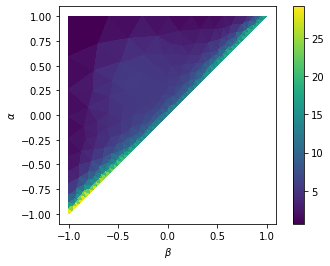

In [71]:
import utils
mesh_points = model.hysteresis_model.mesh_points
x = mesh_points[:,0]
y = mesh_points[:,1]
summary = predict(h, model, guide)
den = torch.nn.Softplus()(summary[0]['density']['mean'].flatten()) / ((0.2 * (torch.abs(x - y)) + 0.05) *
                                            size)
fig, ax = plt.subplots()
c = ax.tripcolor(x, y, den.detach())
ax.set_aspect('equal')
ax.set_xlabel(r'$\beta$')
ax.set_ylabel(r'$\alpha$')
fig.colorbar(c)

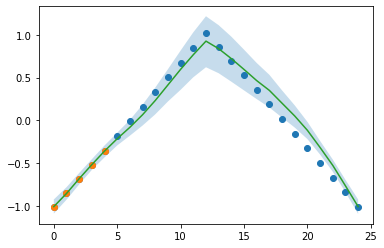

In [70]:
fig2, ax2 = plt.subplots()
y = summary[0]['obs']
ax2.plot(m.detach(), 'o')
ax2.plot(m_train.detach(),'o')

ax2.plot(y['mean'])
ax2.fill_between(range(len(h)),
                 y['5%'],
                 y['95%'],
                 alpha=0.25)